# Check if the data simulation is correct

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dateutil.parser import parse

In [23]:
path_simulation_to='../02_simulation/edificio_este/run/002_ExportVariabletoCSV 1/report_SiteOutdoorAirDrybulbTemperature_ZoneTimestep.csv' #'../01_data/05_simulation_data/edificio_este/run/002_ExportVariabletoCSV/report_SiteOutdoorAirDrybulbTemperature_ZoneTimestep.csv'
path_real='../../01_weather_data/03_imputing_process/01_test_data/tmx_base_2018_solar_angles.csv'
path_zma='../02_simulation/edificio_este/run/003_ExportVariabletoCSV 1/report_ZoneMeanAirTemperature_ZoneTimestep.csv'#'../01_data/05_simulation_data/edificio_este/run/003_ExportVariabletoCSV/report_ZoneMeanAirTemperature_ZoneTimestep.csv'
exported_simulation_data='simulation_data/cnn_15Nov.csv'#'../01_data/05_simulation_data/01_simulation_csvs/SARIMA_0_1_1_imputation_simulation.csv'


In [24]:
df_real=pd.read_csv(path_real,index_col=0,parse_dates=True)
df_epw=pd.read_csv(path_simulation_to,names=['time','to'],skiprows=1)
df_epw.time=pd.to_datetime(df_epw.time,format='%Y-%b-%d %H:%M:%S')
# df_epw.time=df_epw.time+pd.Timedelta('12Y')
df_epw=df_epw.set_index(df_epw.time)
# col_names=list(pd.Series(df.columns).str.replace(':Zone Mean Air Temperature[C]','',regex=False))
# df_epw.to_csv('../01_data/05_simulation_data/01_simulation_csvs/t_outside.csv')
df_combinado=pd.concat((df_epw.to,df_real.to),axis=1)
df_combinado.head()

,to,to
time,,
2018-01-01 00:00:00,NaN,18.70
2018-01-01 00:10:00,19.0,18.95
2018-01-01 00:20:00,18.9,18.94
2018-01-01 00:30:00,18.8,18.77
2018-01-01 00:40:00,18.8,18.81


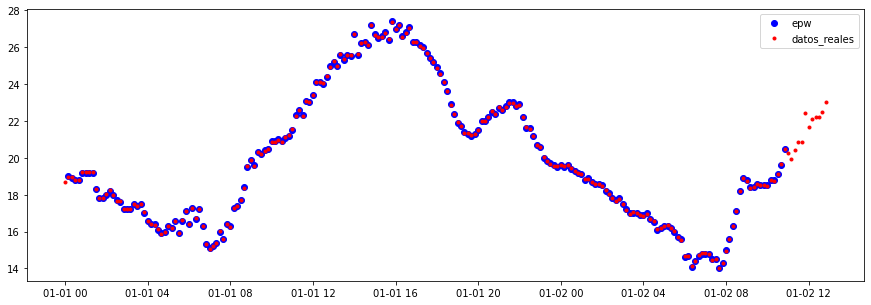

In [25]:
dia='2018-01-01 00:00:00'
dia2='2018-01-02 10:50:00'
fig, ax=plt.subplots(figsize=(15,5))
ax.plot(df_epw.to.loc[dia:dia2],'bo',label='epw')
ax.plot(df_real.to.loc[dia:parse(dia2)+pd.Timedelta('2H')],'r.',label='datos_reales')
ax.legend()

## Saves the data to get a csv

In [26]:
df_zma=pd.read_csv(path_zma,skiprows=0)
columns=list(pd.Series(df_zma.columns).str.replace(':Zone Mean Air Temperature[C]','',regex=False))
# df_zma.time=pd.to_datetime(df_zma.time,format='%Y-%b-%d %H:%M:%S')
# df_zma=df_epw.set_index(df_zma.time)
columns

['Zone Timestep',
 'N1AU401',
 'N1AU402',
 'N1AU403',
 'N1AU404',
 'N2AU101',
 'N2AU102',
 'N2AU103',
 'N2AU201',
 'N2AU202',
 'N2AU203',
 'N2PASILLO',
 'N2STR',
 'PBADM',
 'PBATENCIONCOFI',
 'PBCOORCOFI',
 'PBCOORDINACION',
 'PBDUCTOCOFI',
 'PBDUCTOSALAS',
 'PBDUCTOSCOM',
 'PBIMP',
 'PBSCOM',
 'PBSJUNTAS',
 'PBSMAESTROS',
 'PBSTR',
 'PBVESTIBULO']

In [27]:
nombres=['tiempo',
 'N1AU401',
 'N1AU402',
 'N1AU403',
 'N1AU404',
 'N2AU101',
 'N2AU102',
 'N2AU103',
 'N2AU201',
 'N2AU202',
 'N2AU203',
 'N2PASILLO',
 'N2STR',
 'PBADM',
 'PBATENCIONCOFI',
 'PBCOORCOFI',
 'PBCOORDINACION',
 'PBDUCTOCOFI',
 'PBDUCTOSALAS',
 'PBDUCTOSCOM',
 'PBIMP',
 'PBSCOM',
 'PBSJUNTAS',
 'PBSMAESTROS',
 'PBSTR',
 'PBVESTIBULO']
df_zma=pd.read_csv(path_zma,index_col=0,parse_dates=True,names=nombres,skiprows=1)
df_zma.to_csv(exported_simulation_data)